# Problem 9.6

##### Initialisation

In [1]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

Set parameters

In [2]:
m=1.
g=9.82
l=1.
i1=m*l**2
i2=m*l**2
d=1./2.
k=1.1

#### The system

The State-space representation:
$$
A = \left(
\begin{matrix}
0 & 1 & 0 & 0 & 0 \\
-\frac{m g L}{m L^2} & 0 & 0 & 0 & -\frac{1}{m L^2} \\
0 & 0 & 0 & 1 & 0 \\
0 & 0 & -\frac{m g L}{m L^2} &0 & \frac{1}{m L^2} \\
0 & k d & 0 & -k d & 0 
\end{matrix}
\right),
\; 
B = \left( 
\begin{matrix}
0 \\ \frac{1}{m L^2} \\ 0 \\ 0 \\ 0
\end{matrix}
\right),
\; C = \left(
\begin{matrix}
1 & 0 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 & 0
\end{matrix}
\right),
\; 
D = \left(
\begin{matrix}
0 \\ 0
\end{matrix}
\right)
$$


In [3]:
aa = np.array([[0, 1., 0, 0, 0], [- m * g * l/i1, 0, 0, 0,-1./i1],[0, 0, 0, 1., 0],[0, 0, - m * g * l/i2, 0, 1./i2],[0, k * d, 0, -k * d, 0]])
bb = np.array([[0], [1./i1],[0],[0],[0]])
cc = np.array([[1, 0, 0, 0, 0],[0, 0, 1, 0, 0]])
dd = np.array([[0],[0]])

In [4]:
sys6 = signal.StateSpace(aa, bb, cc, dd)
print("System 6 in State-Space is: ",sys6)
systf6=signal.StateSpace.to_tf(sys6)
print("System 6 in transfer function is: ",systf6)

System 6 in State-Space is:  StateSpaceContinuous(
array([[ 0.  ,  1.  ,  0.  ,  0.  ,  0.  ],
       [-9.82,  0.  ,  0.  ,  0.  , -1.  ],
       [ 0.  ,  0.  ,  0.  ,  1.  ,  0.  ],
       [ 0.  ,  0.  , -9.82,  0.  ,  1.  ],
       [ 0.  ,  0.55,  0.  , -0.55,  0.  ]]),
array([[0.],
       [1.],
       [0.],
       [0.],
       [0.]]),
array([[1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0]]),
array([[0],
       [0]]),
dt: None
)
System 6 in transfer function is:  TransferFunctionContinuous(
array([[ 1.00000000e+00,  0.00000000e+00,  1.03700000e+01,
         0.00000000e+00],
       [ 2.13162821e-14, -7.32747196e-15,  5.50000000e-01,
        -2.60364781e-18]]),
array([  1.    ,   0.    ,  20.74  ,   0.    , 107.2344,   0.    ]),
dt: None
)


C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\filter_design.py:1619: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  "results may be meaningless", BadCoefficients)


First a step-response and a impulse response are simulated with the model.

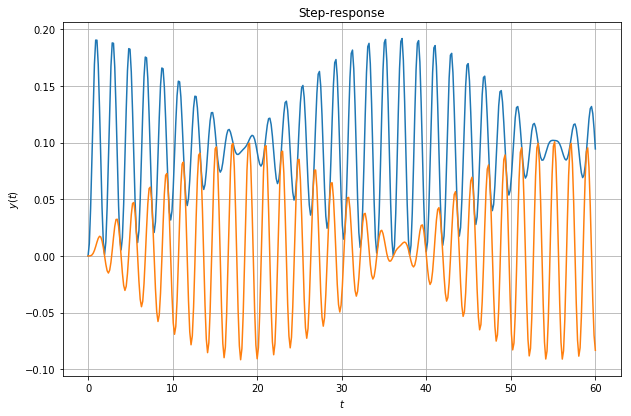

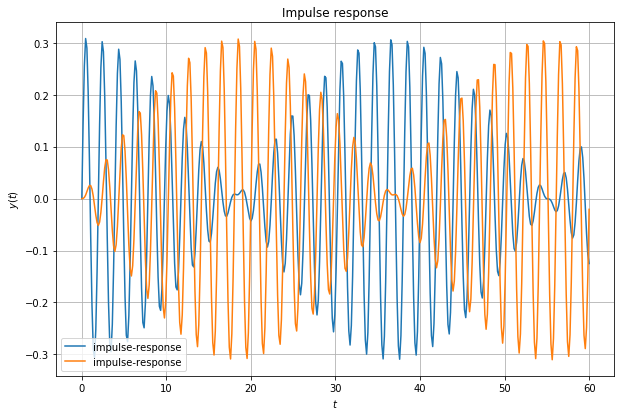

In [5]:
t6 = np.linspace(0, 60, num=400)
u6 = np.ones_like(t6)
tout6, y6, x6 = signal.lsim(systf6, u6, t6)
plt.figure(figsize=(10,6.5))
plt.plot(t6, y6,label='step-response')
plt.xlabel (r'$t$')
plt.ylabel (r'$y(t)$')
plt.title('Step-response')
plt.grid(True)
plt.show()
tout6b, y6b = signal.impulse(systf6,T=t6)
plt.figure(figsize=(10,6.5))
plt.plot(tout6b,y6b,label='impulse-response')
plt.xlabel (r'$t$')
plt.ylabel (r'$y(t)$')
plt.title('Impulse response')
plt.legend()
plt.grid(True)
plt.show()

The impluse response is most clear: in case you hit one pendulum, this one gets an amount of energy and starts to swing. Due to the coupling, the energy is gradually transfered to the second pendulum. Since both pendula are equal, this process repeats itself in a symmetrical manner. 

##### Start the system from Initial conditions without an input function.

Play around with theta1 and theta2 and watch the effect of the simulation. Note that the initial condition for the spring force is calculated from the theta settings. 

In [6]:
theta10 = 0.1
theta20 = -0.1
fk0 = k*d*(theta10-theta20)
x0 = np.array([theta10, 0.0, theta20, 0.0, fk0])
print('Initial conditions: ',x0)

Initial conditions:  [ 0.1   0.   -0.1   0.    0.11]


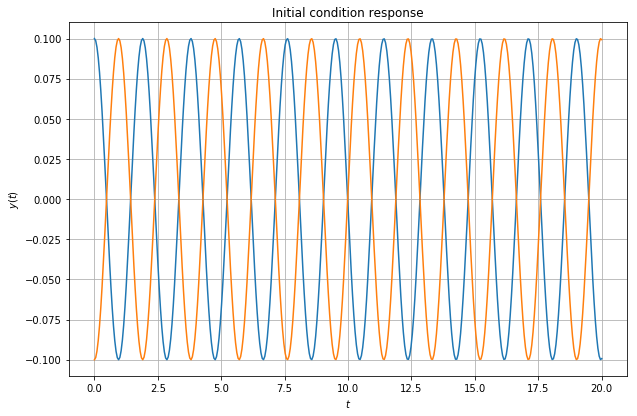

In [7]:
t6i = np.linspace(0, 20, num=400)
tout6i, y6i, x6i = signal.lsim(sys6, None, t6i, X0 = x0)
plt.figure(figsize=(10,6.5))
plt.plot(t6i, y6i, label='initial condition response')
plt.xlabel (r'$t$')
plt.ylabel (r'$y(t)$')
plt.title('Initial condition response')
plt.grid(True)
plt.show()

The result here is the response to initial conditions of two pendula, that are released in oposite directions (i.e. $\pi$ out of phase). The result is that both pendula remain swinging with the same frequency and amplitude and $\pi$ out of phase. 
Explore the reposnse of the pendula to other settings of the initial conditions. 